<a href="https://colab.research.google.com/github/CLAUDERNORONHA/PROJETO-MachineLearning/blob/main/GOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.svm import SVC #importa o algortimo SVM para ser utilizado como classificador
from sklearn import tree  # importa o algoritmo arvore de decisao 
from sklearn.linear_model import LogisticRegression #Importa o algortimo de regressão logistica
from sklearn.metrics import mean_absolute_error #Utilizado para o calculo do MAE
from sklearn.metrics import mean_squared_error #Utilizado para o calculo do MSE
from sklearn import metrics #Utilizado para as metricas de comparacao entre os métodos

from sklearn.ensemble import RandomForestClassifier # Classificador via floresta randômica
#from sklearn.tree import*# Classificador via arvore de decisao
from sklearn.tree import DecisionTreeClassifier# Classificador via arvore de decisao
from sklearn.neighbors import KNeighborsClassifier #Classificador via vizinhos mais proximos

Prever se um personagem vai morrer ou não 

In [3]:
got = pd.read_csv('/content/character-predictions.csv')
got.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [4]:
got.shape

(1946, 33)

In [5]:
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [6]:
got.isnull().sum()

S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [7]:
got.isnull().mean()

S.No                 0.000000
actual               0.000000
pred                 0.000000
alive                0.000000
plod                 0.000000
name                 0.000000
title                0.517986
male                 0.000000
culture              0.652107
dateOfBirth          0.777492
DateoFdeath          0.771840
mother               0.989209
father               0.986639
heir                 0.988181
house                0.219424
spouse               0.858171
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother        0.989209
isAliveFather        0.986639
isAliveHeir          0.988181
isAliveSpouse        0.858171
isMarried            0.000000
isNoble              0.000000
age                  0.777492
numDeadRelations     0.000000
boolDeadRelations    0.000000
isPopular            0.000000
popularity           0.000000
isAlive              0.000000
dtype: flo

In [8]:
got.describe().round()


,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,433.0,444.0,1946.0,1946.0,1946.0,1946.0,1946.0,21.0,26.0,23.0,276.0,1946.0,1946.0,433.0,1946.0,1946.0,1946.0,1946.0,1946.0
mean,974.0,1.0,1.0,1.0,0.0,1.0,1577.0,2950.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-1294.0,0.0,0.0,0.0,0.0,1.0
std,562.0,0.0,0.0,0.0,0.0,0.0,19565.0,28192.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19564.0,1.0,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,-28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-298001.0,0.0,0.0,0.0,0.0,0.0
25%,487.0,0.0,0.0,0.0,0.0,0.0,240.0,282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0
50%,974.0,1.0,1.0,1.0,0.0,1.0,268.0,299.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,1.0
75%,1460.0,1.0,1.0,1.0,1.0,1.0,285.0,299.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,50.0,0.0,0.0,0.0,0.0,1.0
max,1946.0,1.0,1.0,1.0,1.0,1.0,298299.0,298299.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,15.0,1.0,1.0,1.0,1.0


In [9]:
#Procurar se tem idade menor do que 0 

print(got['name'][got['age'] < 0])

print(got['age'][got['age'] < 0 ])

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [10]:
#Substituindo os valores negativos 

got.loc[1684, 'age'] = 25.0
got.loc[1868, 'age'] = 0.0


In [11]:
#vERIFICAR A MUDANÇA DOS VALORES 

print(got['age'].mean())

36.70438799076212


TRATAR VALORES NULOS:

In [16]:
#Trablahndo vom os valores nulos

got['age'].fillna(got['age'].mean(), inplace=True)#subsituir os valores nulos pela média da coluna
got['culture'].fillna('', inplace = True)#preenchendo os valores nulos da coluna com uma string nula

#Preenchendo os valores com -1

got.fillna(value=-1, inplace = True)


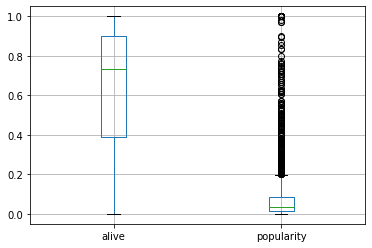

In [18]:
#realizando o BOXPLOT

got.boxplot(['alive','popularity']);

Excluir Colunas;

In [19]:
#Retirando algumas colunas

drop = ["S.No","pred","alive", 'plod', 'isAlive','DateoFdeath']
got.drop(drop, inplace=True, axis=1)



In [22]:
#Criar uma copia do dadtaset para apliacar o HOTENCODER

got_2 = got.copy()

In [23]:
got_2

,actual,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity
0,0,Viserys II Targaryen,-1,1,,-1.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,-1,-1,0,0,0,0,0,1.0,0.0,0.0,-1.0,0,0,36.704388,11,1,1,0.605351
1,1,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,-1,-1,-1,House Frey,Perra Royce,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,1,97.000000,1,1,1,0.896321
2,1,Addison Hill,Ser,1,,-1.0,-1,-1,-1,House Swyft,-1,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,1,36.704388,0,0,0,0.267559
3,0,Aemma Arryn,Queen,0,,82.0,-1,-1,-1,House Arryn,Viserys I Targaryen,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,1,1,23.000000,0,0,0,0.183946
4,1,Sylva Santagar,Greenstone,0,Dornish,276.0,-1,-1,-1,House Santagar,Eldon Estermont,0,0,0,1,0,-1.0,-1.0,-1.0,1.0,1,1,29.000000,0,0,0,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0,Luwin,-1,1,Westeros,-1.0,-1,-1,-1,House Stark,-1,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,36.704388,0,0,1,0.351171
1942,0,Reek,-1,1,,-1.0,-1,-1,-1,House Bolton,-1,0,1,0,1,1,-1.0,-1.0,-1.0,-1.0,0,0,36.704388,0,0,0,0.096990
1943,1,Symeon Star-Eyes,-1,1,,-1.0,-1,-1,-1,-1,-1,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,36.704388,0,0,0,0.030100
1944,1,Coldhands,-1,1,,-1.0,-1,-1,-1,Three-eyed crow,-1,0,0,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,36.704388,0,0,0,0.130435


TRABLHANDO COM DADOS CATEGÓRICOS

In [24]:
#Transformando os dados categoricos em one-hot-enconder

got = pd.get_dummies(got)

#transofrmando dados categoricos em dados númericos 

In [25]:
got

,actual,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,name_Abelar Hightower,name_Addam,name_Addam Frey,name_Addam Marbrand,name_Addam Osgrey,name_Addam Velaryon,name_Addison Hill,name_Aegon Blackfyre,name_Aegon Frey (son of Aenys),name_Aegon Frey (son of Stevron),name_Aegon I Targaryen,name_Aegon II Targaryen,name_Aegon III Targaryen,name_Aegon IV Targaryen,name_Aegon Targaryen (son of Aenys I),name_Aegon Targaryen (son of Baelon),name_Aegon Targaryen (son of Jaehaerys I),name_Aegon Targaryen (son of Rhaegar),name_Aegon V Targaryen,name_Aegor Rivers,name_Aelinor Penrose,...,spouse_Shiera Crakehall,spouse_Shierle Swyft,spouse_Sigorn,spouse_Simon Staunton,spouse_Stannis Baratheon,spouse_Steffon Baratheon,spouse_Stevron Frey,spouse_Stonetree,spouse_Sybell Spicer,spouse_Sybelle Glover,spouse_Sylva Santagar,spouse_Sylwa Paege,spouse_Symond Frey,spouse_Taena of Myr,spouse_Teora Kyndall,spouse_Theodore Tyrell,spouse_Theomar Smallwood,spouse_Titus Peake,spouse_Tya Lannister,spouse_Tyana Wylde,spouse_Tygett Lannister,spouse_Tyrek Lannister,spouse_Tyrion Lannister,spouse_Tysha,spouse_Tytos Frey,spouse_Tywin Lannister,spouse_Victaria Tyrell,spouse_Viserys I Targaryen,spouse_Walder Frey,spouse_Walter Whent,spouse_Walton Frey,spouse_Whalen Frey,spouse_Willam Dustin,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Ysilla,spouse_Ysilla Royce,spouse_Zhoe Blanetree
0,0,1,-1.0,0,0,0,0,0,1.0,0.0,0.0,-1.0,0,0,36.704388,11,1,1,0.605351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,208.0,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,1,97.000000,1,1,1,0.896321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,-1.0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,1,36.704388,0,0,0,0.267559,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,82.0,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,1,1,23.000000,0,0,0,0.183946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,276.0,0,0,0,1,0,-1.0,-1.0,-1.0,1.0,1,1,29.000000,0,0,0,0.043478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0,1,-1.0,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,36.704388,0,0,1,0.351171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1942,0,1,-1.0,0,1,0,1,1,-1.0,-1.0,-1.0,-1.0,0,0,36.704388,0,0,0,0.096990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1943,1,1,-1.0,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,36.704388,0,0,0,0.030100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1944,1,1,-1.0,0,0,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,36.704388,0,0,0,0.130435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
got.shape

(1946, 2958)

SEPARAR I DATASET ENTRE ENTRADAS E SAÍDAS;

In [27]:
#Separando o dataset entre estradas e saidas

x = got.iloc[:, 1:].values#todas as linhas da coluna 2 até o final 
y = got.iloc[:, 0].values#todasas linha da segunda coluna para ser a nossa saída.

In [32]:
from pandas.core.common import random_state
#separando os dados para a apliicação do modelo de validação cruzada
#divide o dataset entre 5 diferente grupos

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#KFOLD vai mostrar a quantidade de divisões 

In [33]:
print(kfold.get_n_splits())

#Dividi em 5 conjuntos de entra e saida 

5


CONSTRUINDO OS MODELOS DE CLASSIFICAÇÃO 

In [34]:
modelos = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=42),
           DecisionTreeClassifier(random_state=42), SVC(kernel='linear', gamma='scale', random_state=42),
           KNeighborsClassifier()]

In [35]:
#Utilizando a validação cruzada

mean = []
std = []

for model in modelos:
  result = cross_val_score(model, x, y, cv=kfold, scoring='accuracy', n_jobs=-1)
  mean.append(result)
  std.append(result)

cRIANDO UM GRAFICO 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

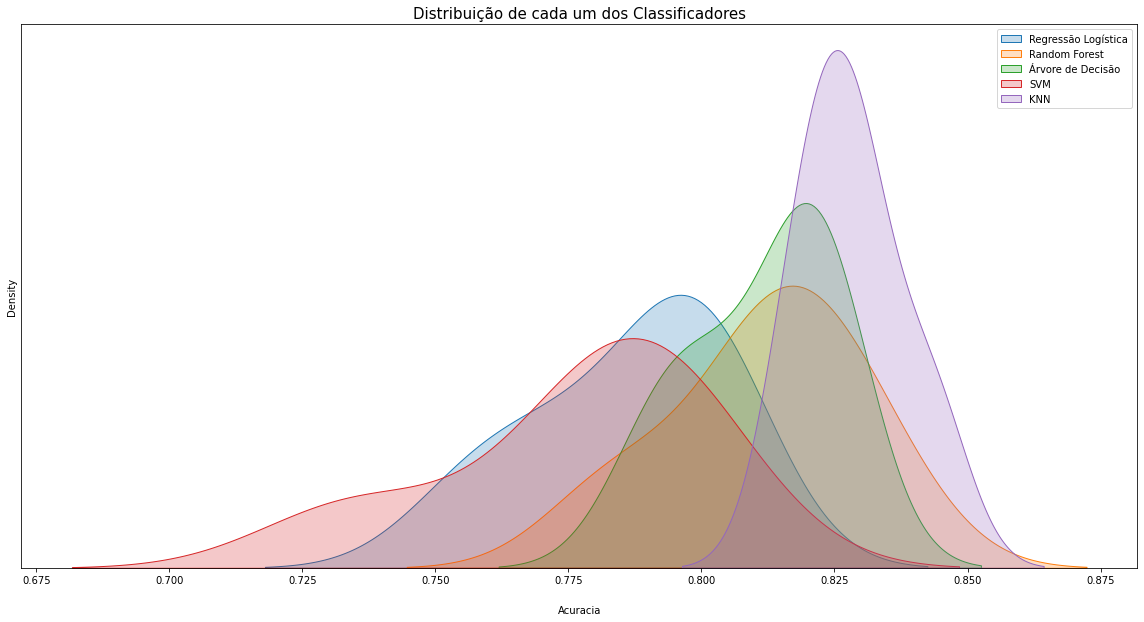

In [40]:
classificadores=['Regressão Logística', 'Random Forest','Árvore de Decisão', 'SVM', 'KNN']

plt.figure(figsize=(20,10))
for i in range(len(mean)):
  sns.distplot(mean[i], hist=False,  kde_kws={"shade":True})

plt.title('Distribuição de cada um dos Classificadores', fontsize=15)
plt.legend(classificadores)
plt.xlabel("Acuracia", labelpad=20)
plt.yticks([])
plt.show();


olhando os graficos o KNN teve um desempenho melhor, ele esta proximo do valor 1

Segundo lugar temos temos a floresta randomica

Vou escolher dois modelos , A floresta Randomica e o SVM

In [45]:
#dividindo o datase5 entre treinamento 80% e teste 20 %


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    shuffle=True, random_state=42)

In [48]:
#Escolhendo o SVM e a floresta randomica

svm_clf = SVC(C=0.9, gamma=0.1, kernel='linear', probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)


#treinar os modelos

svm_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)



RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [49]:



#Obtendo as probabilidade previstas 

svm_prob = svm_clf.predict_log_proba(x_test)
rf_prob = rf_clf.predict_proba(x_test)

#valores Reais 

svm_preds = np.argmax(svm_prob, axis=1)
rf_preds = np.argmax(rf_prob, axis=1)

Analisando os Modelos 

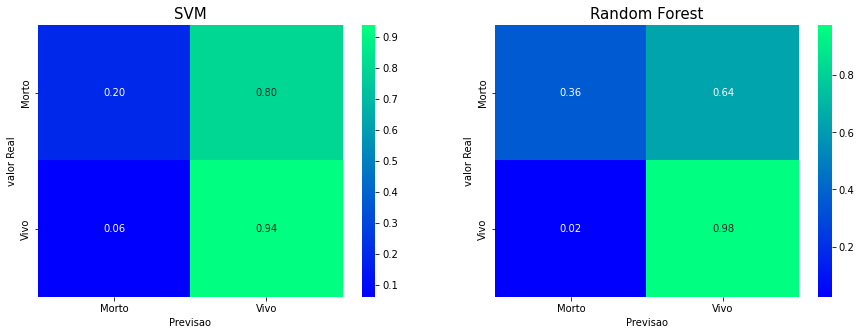

In [56]:
cm = metrics.confusion_matrix(y_test, svm_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm2 = metrics.confusion_matrix(y_test, rf_preds)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

classes = ['Morto', 'Vivo']
f, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].set_title('SVM', fontsize=15.)
sns.heatmap(pd.DataFrame(cm, index=classes, columns=classes),
            cmap = 'winter', annot=True, fmt='.2f', ax=ax[0]).set(xlabel='Previsao', ylabel='valor Real')

ax[1].set_title('Random Forest', fontsize=15.)
sns.heatmap(pd.DataFrame(cm2, index=classes, columns=classes),
            cmap='winter', annot=True, fmt='.2f', ax=ax[1]).set(xlabel='Previsao',
                                                               ylabel='valor Real') ;        

O nosso modelo não tiveram um resultado muito legal, exeploo SVM prevviu apenas 20% de quem estava morto. E previu apenas 0.006 das
pessoas que estão vivas 


A mesma coisa com o Random Forest. previu 36% das pessoas mortas e 0.02 das pessas vivas. RAdmom Forest foi melhor.


Temos que melhoras esses dois algortimos.
